Внимательно можно и не присматриваться, ничего не получилось, какой-то ключевой момент упускаю.

Очень жду итогового разбора.

# Входные данные

In [910]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.stats import ttest_ind

pd.options.display.max_columns = None
pd.options.display.max_rows = None

math = pd.read_csv('stud_math.csv')

math.columns = ['school', 'sex', 'age', 'address', 'famsize', 'p_status', 'm_edu', 'f_edu',
       'm_job', 'f_job', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']

display(math.head(10))

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [911]:
math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             378 non-null    object 
 4   famsize             368 non-null    object 
 5   p_status            350 non-null    object 
 6   m_edu               392 non-null    float64
 7   f_edu               371 non-null    float64
 8   m_job               376 non-null    object 
 9   f_job               359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  traveltime          367 non-null    float64
 13  studytime           388 non-null    float64
 14  failures            373 non-null    float64
 15  schoolsup           386 non-null    object 
 16  famsup  

# Беглый анализ колонок

In [912]:
math.f_edu = math.f_edu.apply(lambda x: None if x > 4.0 else x)

for col in ['school', 'sex', 'address', 'famsize', 'p_status', 'm_edu', 'f_edu', 'reason',
       'm_job', 'f_job', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    math[col] = math[col].apply(lambda x: None if str(x).strip() == '' else x)
    math[col] = math[col].fillna(method = 'ffill')
    display(pd.DataFrame(math[col].value_counts()))
    display(math[col].isna().sum())

,school
GP,349
MS,46


0

,sex
F,208
M,187


0

,address
U,304
R,91


0

,famsize
GT3,279
LE3,115


1

,p_status
T,353
A,42


0

,m_edu
4.0,132
2.0,103
3.0,97
1.0,60
0.0,3


0

,f_edu
2.0,112
3.0,105
4.0,93
1.0,83
0.0,2


0

,reason
course,146
reputation,108
home,105
other,36


0

,m_job
other,138
services,105
at_home,63
teacher,57
health,32


0

,f_job
other,215
services,115
teacher,30
at_home,19
health,16


0

,guardian
mother,273
father,93
other,29


0

,schoolsup
no,343
yes,52


0

,famsup
yes,243
no,152


0

,paid
no,224
yes,171


0

,activities
yes,203
no,192


0

,nursery
yes,312
no,83


0

,higher
yes,374
no,21


0

,internet
yes,329
no,65


1

,romantic
no,260
yes,135


0

## age

<AxesSubplot:>

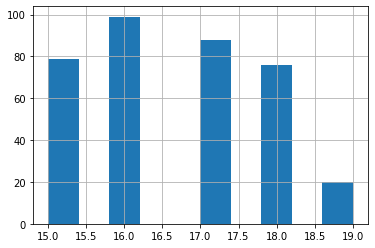

In [933]:
math.age.hist(bins=10)

## traveltime

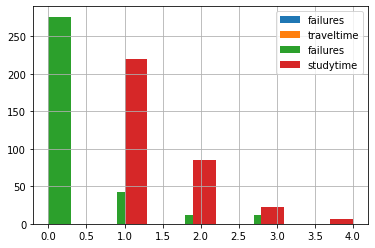

In [957]:
for col in ['failures', 'traveltime']:
    math[col] = math[col].fillna(math[col].mode())
    math[col].hist(label=col)
plt.legend();

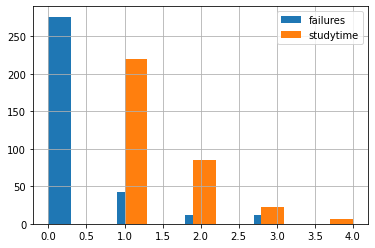

In [958]:
for col in ['failures', 'studytime']:
    math[col] = math[col].fillna(math[col].mode())
    math[col].hist(label=col)
plt.legend();

## freetime & goout

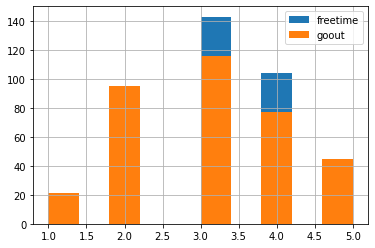

In [951]:
for col in ['freetime', 'goout']:
    math[col] = math[col].fillna(math[col].mode())
    math[col].hist(label=col)
plt.legend();

## health

<AxesSubplot:>

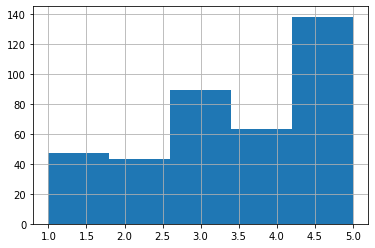

In [920]:
math.health.hist(bins=5)

## absences

<AxesSubplot:>

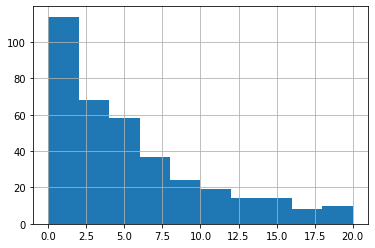

In [921]:
q25 = math.absences.quantile(0.25)
q75 = math.absences.quantile(0.75)
iqr = q75 - q25
math = math.loc[math.absences.between(q25 - 1.5*iqr, q75 + 1.5*iqr)]

math.absences.hist()

## score

5

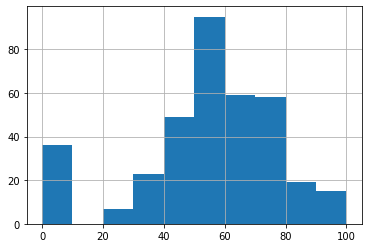

In [922]:
math.score.dropna()
math.score.hist(bins=10)
display(math.score.isna().sum())

# Чистка 1

In [923]:
math.drop(['studytime_granular'], inplace=True, axis=1)
math = math.loc[math.age <= 19]

# Корреляции

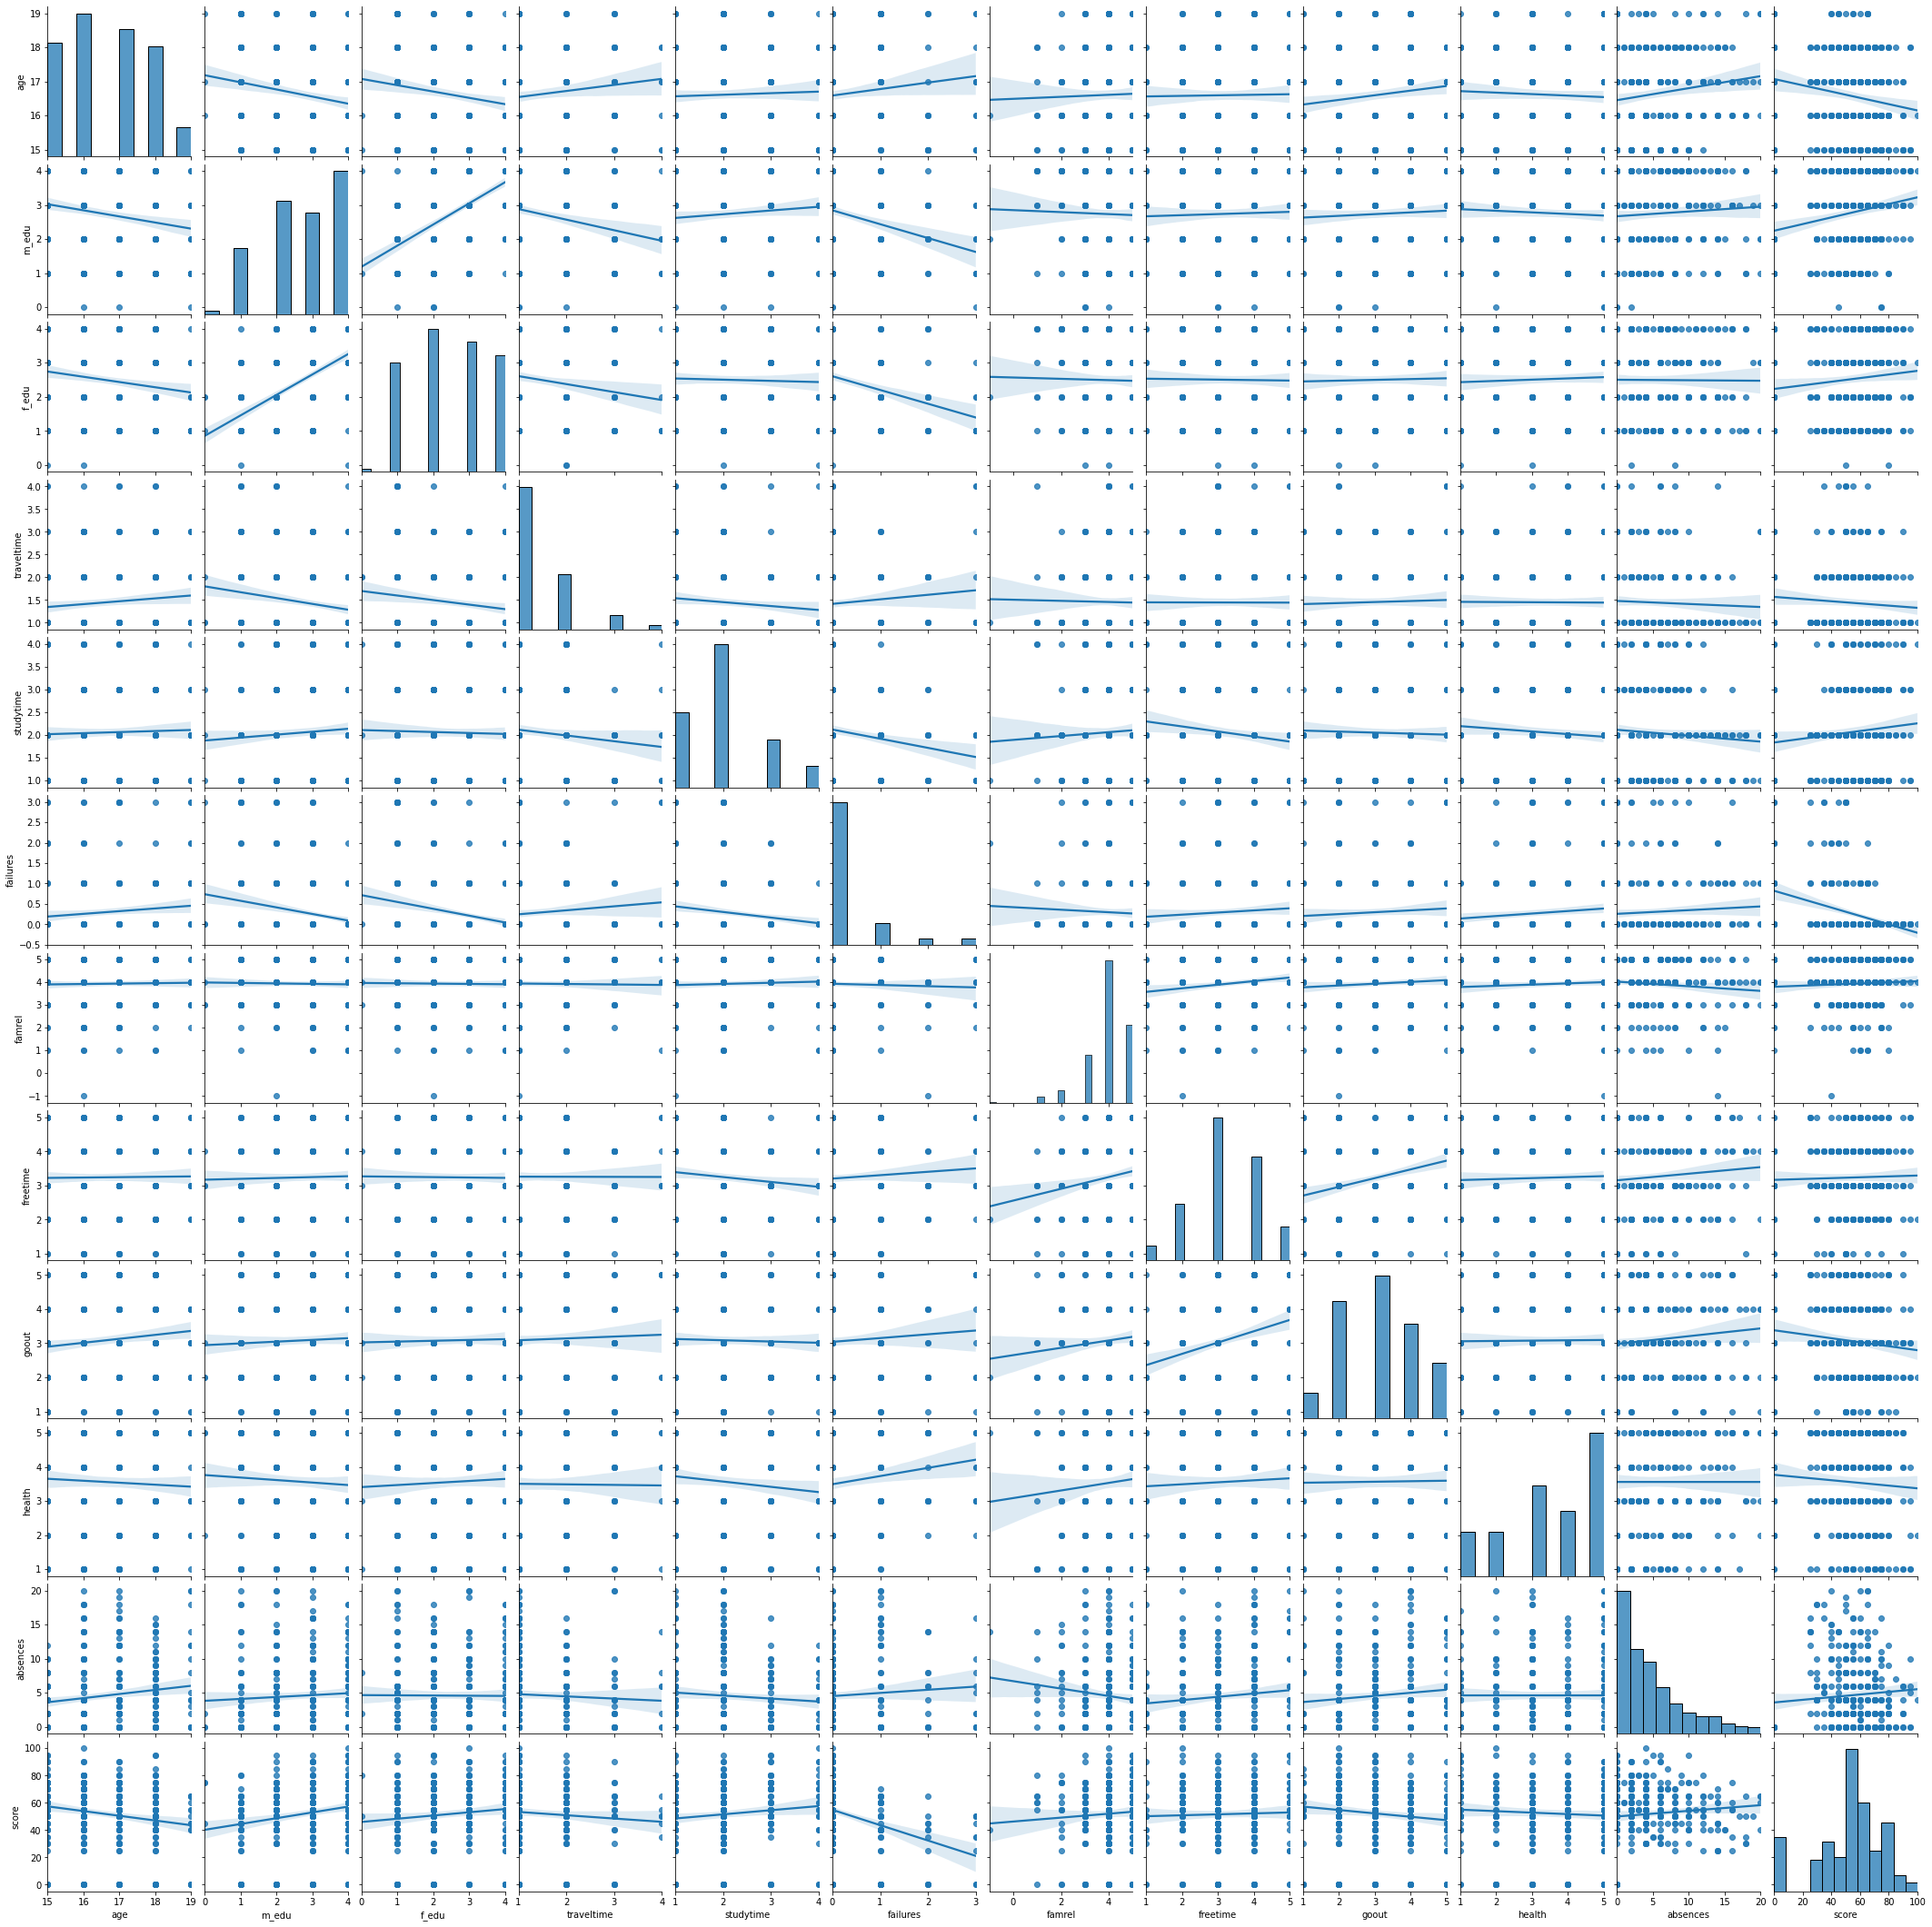

In [924]:
sns.pairplot(math, kind = 'reg')

In [925]:
math.corr()

,age,m_edu,f_edu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.193330,-0.168589,0.106158,0.032539,0.112101,0.023276,0.013338,0.125365,-0.050202,0.145725,-0.178395
m_edu,-0.193330,1.000000,0.609632,-0.199717,0.084014,-0.256292,-0.024633,0.028768,0.050887,-0.058627,0.062548,0.204213
f_edu,-0.168589,0.609632,1.000000,-0.152754,-0.027274,-0.259844,-0.016594,-0.012345,0.023535,0.046757,-0.006584,0.112045
traveltime,0.106158,-0.199717,-0.152754,1.000000,-0.104572,0.098694,-0.016140,-0.002146,0.034873,-0.008130,-0.046348,-0.076512
studytime,0.032539,0.084014,-0.027274,-0.104572,1.000000,-0.166474,0.046422,-0.126148,-0.028870,-0.095006,-0.075376,0.113057
failures,0.112101,-0.256292,-0.259844,0.098694,-0.166474,1.000000,-0.040745,0.072023,0.071430,0.121242,0.064843,-0.340410
famrel,0.023276,-0.024633,-0.016594,-0.016140,0.046422,-0.040745,1.000000,0.164886,0.092287,0.077281,-0.105254,0.059317
freetime,0.013338,0.028768,-0.012345,-0.002146,-0.126148,0.072023,0.164886,1.000000,0.291276,0.040947,0.096753,0.029589
goout,0.125365,0.050887,0.023535,0.034873,-0.028870,0.071430,0.092287,0.291276,1.000000,0.011945,0.101471,-0.120564
health,-0.050202,-0.058627,0.046757,-0.008130,-0.095006,0.121242,0.077281,0.040947,0.011945,1.000000,-0.000134,-0.065582


# Анализ номинативных переменных

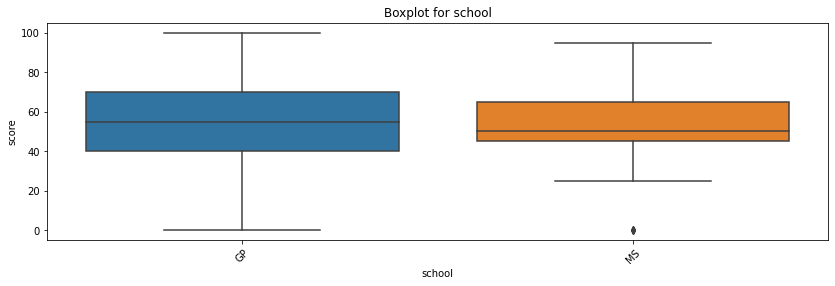

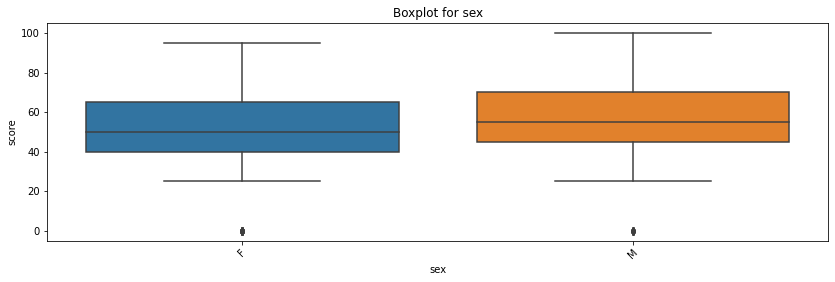

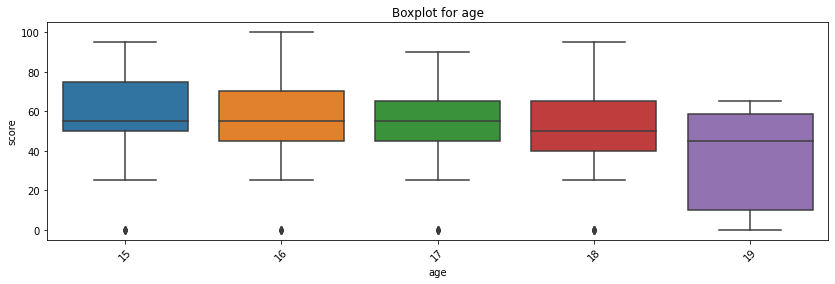

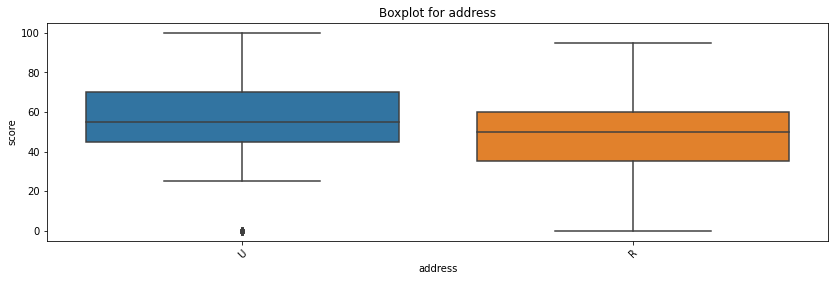

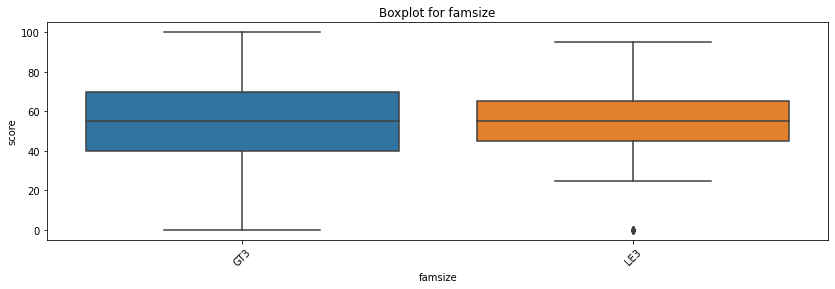

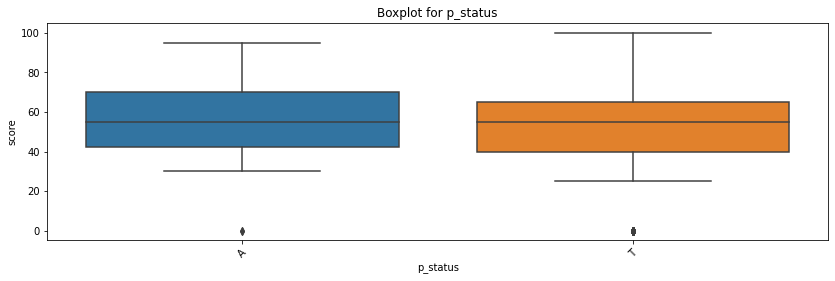

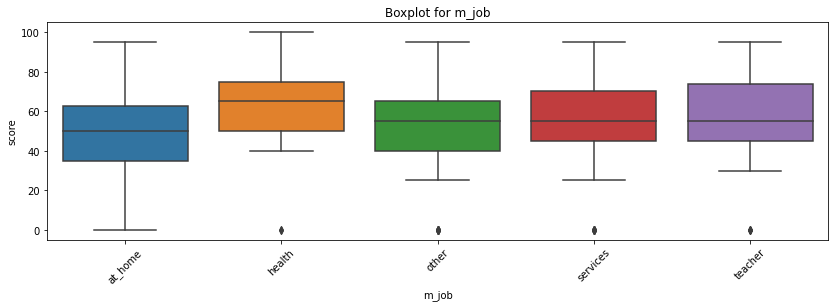

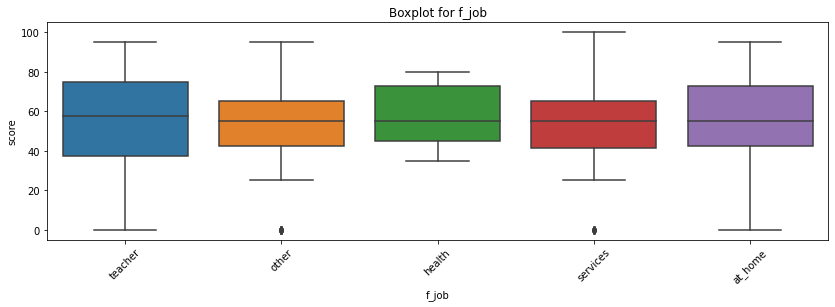

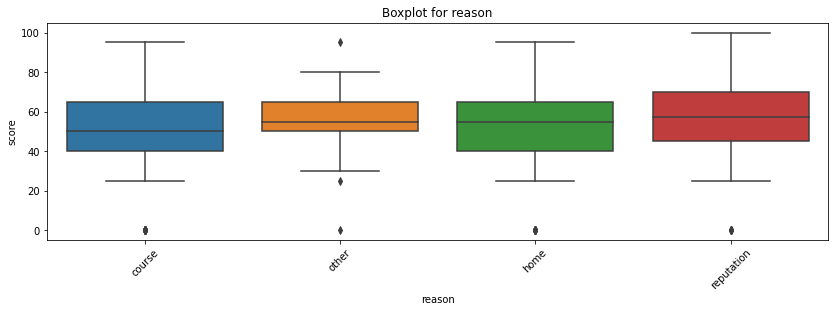

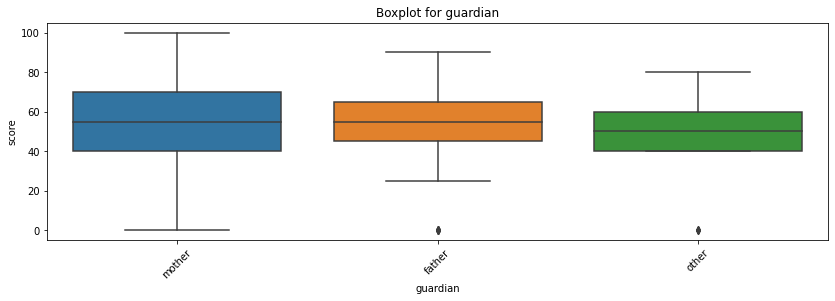

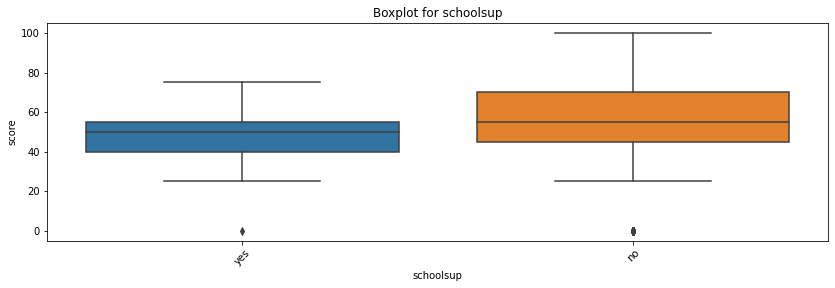

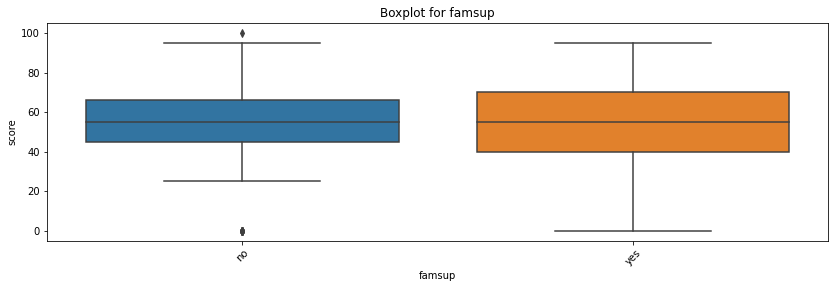

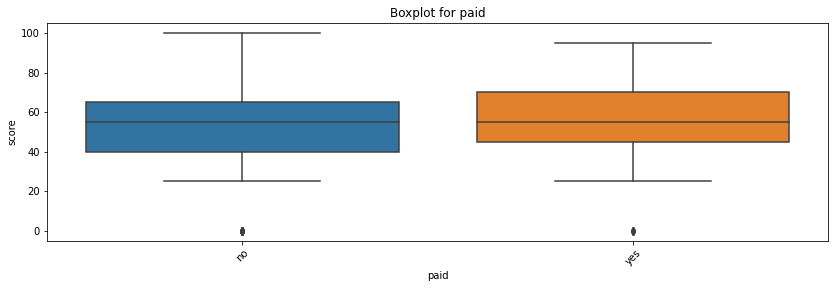

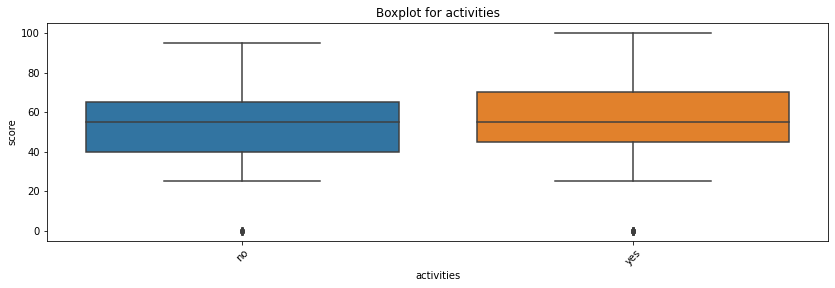

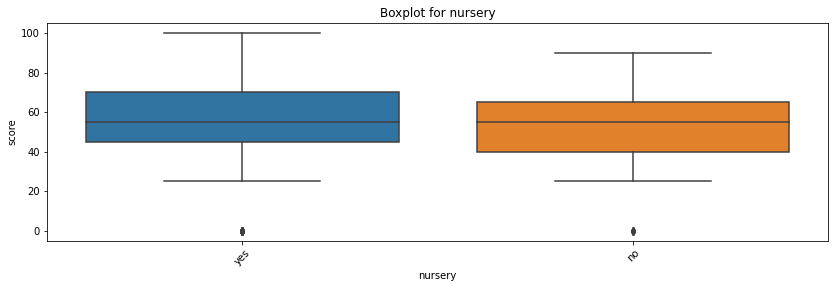

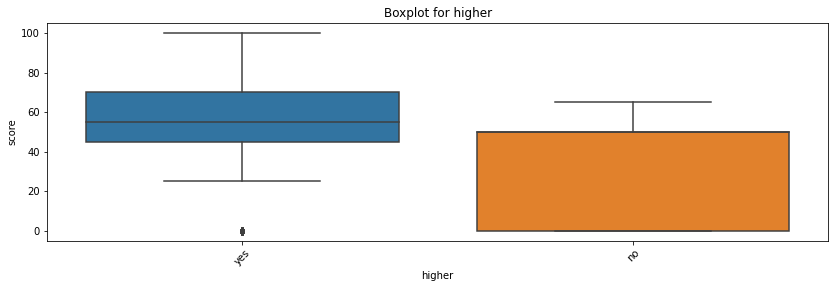

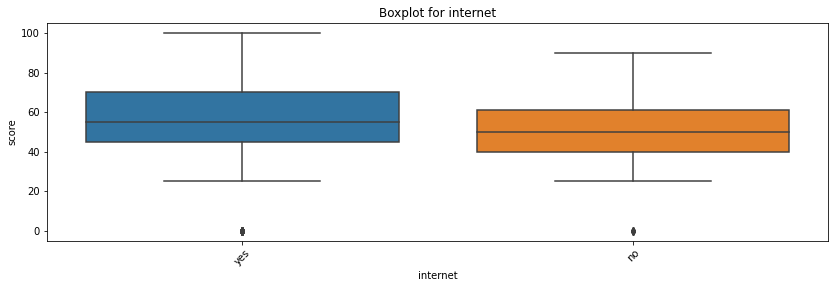

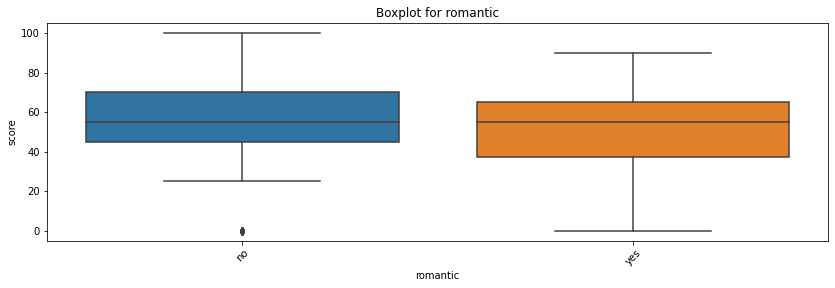

In [926]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=math.loc[math.loc[:, column].isin(math.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
for col in ['school', 'sex', 'age', 'address', 'famsize', 'p_status', 'm_job', 'f_job', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [927]:
def get_stat_dif(column):
    cols = math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math.loc[math.loc[:, column] == comb[0], 'score'], 
                        math.loc[math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
            
for col in ['school', 'sex', 'age', 'address', 'famsize', 'p_status', 'm_job', 'f_job', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки m_job
